## Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"] #clase social

In [6]:
n = 500 # Tamaño del datasets
gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    
gender_data[1:10]

['Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male']

In [7]:
income_data[1:10]

['Middle Class',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Poor',
 'Rich',
 'Rich',
 'Middle Class',
 'Rich']

In [25]:
# Z = N (0,1)
# N (m,s) -> m + s * z
height = 160 + 30 * np.random.randn(n) # cm
weight = 65 + 20 * np.random.randn(n) # kg
age = 30 + 12 * np.random.randn(n)
salary = 18000 + 3500 * np.random.randn(n)

In [32]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": salary
    }
)

In [34]:
data["Age"] = round(data["Age"], 0)
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,155.938007,49.043095,36.0,18108.614909
1,Female,Middle Class,205.598958,53.082391,30.0,15408.497205
2,Male,Middle Class,160.131571,89.407272,28.0,18822.580119
3,Female,Poor,114.253225,34.681641,12.0,13587.482784
4,Male,Middle Class,195.404187,61.343711,35.0,22029.095848


## Agrupación de datos

In [36]:
grouped_gender = data.groupby("Gender") 
# No rompe los datos originales, sino que crea un objeto con dos atributos (nombre y grupo)
# Esto en basse al label o columna seleccionada (variable categorica)

In [37]:
grouped_gender.groups

{'Female': Int64Index([  1,   3,  13,  15,  16,  17,  18,  24,  27,  28,
             ...
             482, 484, 486, 488, 489, 491, 493, 494, 497, 498],
            dtype='int64', length=245),
 'Male': Int64Index([  0,   2,   4,   5,   6,   7,   8,   9,  10,  11,
             ...
             479, 480, 483, 485, 487, 490, 492, 495, 496, 499],
            dtype='int64', length=255)}

In [38]:
for names,groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight   Age        Income
1    Female    Middle Class  205.598958   53.082391  30.0  15408.497205
3    Female            Poor  114.253225   34.681641  12.0  13587.482784
13   Female    Middle Class  204.207918   73.849485  40.0  15967.882343
15   Female    Middle Class  113.042678   72.363545  42.0  23725.377888
16   Female            Poor  107.931308   58.759302  50.0  17287.866805
17   Female            Poor  186.215865   54.466436  29.0  19925.071110
18   Female    Middle Class  164.436379   71.824297  27.0  14550.088139
24   Female    Middle Class  224.146089   59.154362  27.0  18958.055138
27   Female    Middle Class  179.053540   64.048449  16.0  14996.749256
28   Female            Rich  197.328200   56.227972  33.0  16742.128410
31   Female    Middle Class  111.411323   93.920999  15.0  22026.498163
32   Female    Middle Class  126.147711   84.789387  41.0  22461.132399
33   Female            Poor  122.172703   63.230499  26.0

In [39]:
grouped_gender.get_group("Female")
## Obtengo el data frame de mujeres

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,205.598958,53.082391,30.0,15408.497205
3,Female,Poor,114.253225,34.681641,12.0,13587.482784
13,Female,Middle Class,204.207918,73.849485,40.0,15967.882343
15,Female,Middle Class,113.042678,72.363545,42.0,23725.377888
16,Female,Poor,107.931308,58.759302,50.0,17287.866805
17,Female,Poor,186.215865,54.466436,29.0,19925.071110
18,Female,Middle Class,164.436379,71.824297,27.0,14550.088139
24,Female,Middle Class,224.146089,59.154362,27.0,18958.055138
27,Female,Middle Class,179.053540,64.048449,16.0,14996.749256
28,Female,Rich,197.328200,56.227972,33.0,16742.128410


In [40]:
#Si quiero por mas de una categoria?
double_group = data.groupby(["Gender", "Economic Status"])

In [41]:
len(double_group)

6

In [42]:
for names,groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight   Age        Income
1    Female    Middle Class  205.598958  53.082391  30.0  15408.497205
13   Female    Middle Class  204.207918  73.849485  40.0  15967.882343
15   Female    Middle Class  113.042678  72.363545  42.0  23725.377888
18   Female    Middle Class  164.436379  71.824297  27.0  14550.088139
24   Female    Middle Class  224.146089  59.154362  27.0  18958.055138
27   Female    Middle Class  179.053540  64.048449  16.0  14996.749256
31   Female    Middle Class  111.411323  93.920999  15.0  22026.498163
32   Female    Middle Class  126.147711  84.789387  41.0  22461.132399
46   Female    Middle Class  181.296847  60.757798  36.0  11785.017566
52   Female    Middle Class  177.959983  28.289706  30.0  14882.970866
53   Female    Middle Class  132.841293  84.297497  30.0  19617.663033
55   Female    Middle Class  155.596317  63.840790  12.0  15077.470238
64   Female    Middle Class  186.020670  78.661818

## Operaciones sobre datos agrupados

In [43]:
double_group.sum()

Height       Weight     Age        Income
Gender Economic Status                                                 
Female Middle Class     15276.880729  6006.442968  2704.0  1.600611e+06
       Poor             12717.386363  5168.848881  2505.0  1.424232e+06
       Rich             11611.000127  4848.833535  2130.0  1.286300e+06
Male   Middle Class     12133.569850  5043.575347  2387.0  1.392972e+06
       Poor             15051.623498  6377.932875  2888.0  1.764288e+06
       Rich             12921.040299  5477.363474  2693.0  1.448332e+06

In [44]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     164.267535  64.585408  29.075269  17210.874395
       Poor             160.979574  65.428467  31.708861  18028.258471
       Rich             159.054796  66.422377  29.178082  17620.554461
Male   Middle Class     159.652235  66.362834  31.407895  18328.573680
       Poor             155.171376  65.751885  29.773196  18188.537187
       Rich             157.573662  66.797116  32.841463  17662.580831

In [45]:
double_group.size()

Gender  Economic Status
Female  Middle Class       93
        Poor               79
        Rich               73
Male    Middle Class       76
        Poor               97
        Rich               82
dtype: int64

In [46]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      93.0  164.267535  32.081755   99.619163  139.045542   
       Poor              79.0  160.979574  32.204564   72.202080  139.837648   
       Rich              73.0  159.054796  26.156657  105.250266  136.866413   
Male   Middle Class      76.0  159.652235  33.395871   77.007274  138.614207   
       Poor              97.0  155.171376  29.921193   77.888657  133.965123   
       Rich              82.0  157.573662  29.275272   99.948362  136.056545   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     165.238136  186.020670  234.841917   93.0  64.585408   
       Poor             160.259484  183.222683  235.096313   79.0  65.428467   
       Rich             163.792832  178.160463  211.592160   73.0  66.422377   
Male   Middle Class     163.052361  185.339385  219.498332   76.0  66.362834   
       Poor             150.919049  177.504428  231.619212   97.0  65.751885   
       Rich             155.905205  175.618912  245.781468   82.0  66.797116   

                        ...   Age       Income                             \
                        ...   75%   max  count          mean          std   
Gender Economic Status  ...                                                 
Female Middle Class     ...  39.0  58.0   93.0  17210.874395  3383.650047   
       Poor             ...  38.5  60.0   79.0  18028.258471  3317.595759   
       Rich             ...  37.0  55.0   73.0  17620.554461  3065.457487   
Male   Middle Class     ...  39.0  60.0   76.0  18328.573680  3297.770747   
       Poor             ...  39.0  60.0   97.0  18188.537187  3617.213250   
       Rich             ...  42.0  58.0   82.0  17662.580831  3149.733893   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class      9872.162212  14971.190959  17113.771700   
       Poor             11172.161373  15768.795440  17963.991117   
       Rich             10830.784206  15493.427706  17518.672653   
Male   Middle Class      7099.970444  16561.545935  18194.705044   
       Poor             10083.574343  15813.609986  17717.575055   
       Rich              9194.754909  15662.227281  17685.081465   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     19592.993909  24122.755281  
       Poor             20187.590641  26631.181669  
       Rich             20011.425028  24369.202997  
Male   Middle Class     20684.286712  25196.595300  
       Poor             20320.828724  26235.698238  
       Rich             19348.958296  26558.418017  

[6 rows x 32 columns]

In [47]:
grouped_income = double_group["Income"]

In [48]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      93.0  17210.874395  3383.650047   9872.162212   
       Poor              79.0  18028.258471  3317.595759  11172.161373   
       Rich              73.0  17620.554461  3065.457487  10830.784206   
Male   Middle Class      76.0  18328.573680  3297.770747   7099.970444   
       Poor              97.0  18188.537187  3617.213250  10083.574343   
       Rich              82.0  17662.580831  3149.733893   9194.754909   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     14971.190959  17113.771700  19592.993909  24122.755281  
       Poor             15768.795440  17963.991117  20187.590641  26631.181669  
       Rich             15493.427706  17518.672653  20011.425028  24369.202997  
Male   Middle Class     16561.545935  18194.705044  20684.286712  25196.595300  
       Poor             15813.609986  17717.575055  20320.828724  26235.698238  
       Rich             15662.227281  17685.081465  19348.958296  26558.418017

In [49]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.600611e+06  29.075269  32.081755
       Poor             1.424232e+06  31.708861  32.204564
       Rich             1.286300e+06  29.178082  26.156657
Male   Middle Class     1.392972e+06  31.407895  33.395871
       Poor             1.764288e+06  29.773196  29.921193
       Rich             1.448332e+06  32.841463  29.275272

In [51]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: np.mean(h)/np.std(h)  
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.075269  5.148031
       Poor             31.708861  5.030598
       Rich             29.178082  6.122936
Male   Middle Class     31.407895  4.812363
       Poor             29.773196  5.212943
       Rich             32.841463  5.415607

In [52]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15276.880729  164.267535  32.081755  6006.442968   
       Poor             12717.386363  160.979574  32.204564  5168.848881   
       Rich             11611.000127  159.054796  26.156657  4848.833535   
Male   Middle Class     12133.569850  159.652235  33.395871  5043.575347   
       Poor             15051.623498  155.171376  29.921193  6377.932875   
       Rich             12921.040299  157.573662  29.275272  5477.363474   

                                                 Age                        \
                             mean        std     sum       mean        std   
Gender Economic Status                                                       
Female Middle Class     64.585408  18.996449  2704.0  29.075269  12.204985   
       Poor             65.428467  18.753883  2505.0  31.708861  11.824737   
       Rich             66.422377  21.167320  2130.0  29.178082  10.325726   
Male   Middle Class     66.362834  20.450434  2387.0  31.407895  10.794045   
       Poor             65.751885  22.224357  2888.0  29.773196  11.622988   
       Rich             66.797116  18.848745  2693.0  32.841463  12.770983   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.600611e+06  17210.874395  3383.650047  
       Poor             1.424232e+06  18028.258471  3317.595759  
       Rich             1.286300e+06  17620.554461  3065.457487  
Male   Middle Class     1.392972e+06  18328.573680  3297.770747  
       Poor             1.764288e+06  18188.537187  3617.213250  
       Rich             1.448332e+06  17662.580831  3149.733893

In [53]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.148031  3.418295  2.395157  5.114051
       Poor             5.030598  3.511089  2.698705  5.468857
       Rich             6.122936  3.159685  2.845321  5.787879
Male   Middle Class     4.812363  3.266620  2.929077  5.594798
       Poor             5.212943  2.973920  2.574885  5.054450
       Rich             5.415607  3.565658  2.587394  5.642151

## Filtrado de datos

In [55]:
double_group["Age"].filter(lambda x:x.sum()>2400)

0      36.0
1      30.0
3      12.0
5      17.0
6      33.0
7      35.0
9      -2.0
10     36.0
11     46.0
12     33.0
13     40.0
14     47.0
15     42.0
16     50.0
17     29.0
18     27.0
20     24.0
21     27.0
22     36.0
23     57.0
24     27.0
26     26.0
27     16.0
31     15.0
32     41.0
33     26.0
36     31.0
37     30.0
38     20.0
42     54.0
       ... 
461    15.0
462    16.0
463    21.0
464    20.0
465    31.0
467    24.0
469    24.0
471    17.0
472    49.0
473    22.0
474    58.0
475    47.0
476    18.0
477    20.0
480    39.0
481    52.0
482    33.0
483    11.0
484     6.0
485    49.0
486    13.0
487    40.0
488    39.0
489    35.0
490    30.0
493    17.0
495    26.0
496    17.0
497    49.0
499    37.0
Name: Age, Length: 351, dtype: float64

## Transformación de variables

In [58]:
zscore = lambda x: (x - x.mean()/x.std())

In [60]:
z_group = double_group.transform(zscore)

(array([  7.,  10.,  37.,  78.,  91., 108.,  75.,  59.,  20.,  15.]),
 array([-4.57156891,  1.62943014,  7.83042919, 14.03142824, 20.23242729,
        26.43342634, 32.63442539, 38.83542444, 45.03642349, 51.23742254,
        57.43842159]),
 <a list of 10 Patch objects>)

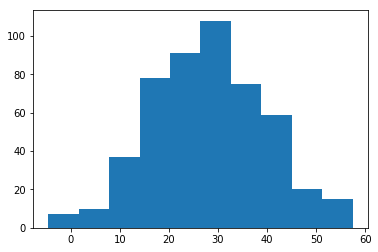

In [62]:
plt.hist(z_group["Age"])

In [64]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [65]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,155.938007,49.043095,36.0,18108.614909
1,205.598958,53.082391,30.0,15408.497205
2,160.131571,89.407272,28.0,18822.580119
3,114.253225,34.681641,12.0,13587.482784
4,195.404187,61.343711,35.0,22029.095848
5,148.940014,33.249375,17.0,19117.362104
6,141.150699,50.310774,33.0,19693.144733
7,163.192601,33.255465,35.0,20505.143147
8,192.982855,72.769046,48.0,20951.803187
9,164.104946,42.966274,-2.0,18493.545085


## Operaciones diversas muy útiles

In [66]:
double_group.head(1)
# El primero de cada grupo (primera fila u ocurrencia)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,155.938007,49.043095,36.0,18108.614909
1,Female,Middle Class,205.598958,53.082391,30.0,15408.497205
2,Male,Middle Class,160.131571,89.407272,28.0,18822.580119
3,Female,Poor,114.253225,34.681641,12.0,13587.482784
5,Male,Poor,148.940014,33.249375,17.0,19117.362104
28,Female,Rich,197.328200,56.227972,33.0,16742.128410


In [68]:
double_group.tail(1)
# El ultimo de cada grupo (ultima fila u ocurrencia)

,Gender,Economic Status,Height,Weight,Age,Income
492,Male,Middle Class,119.427808,58.352220,40.0,11978.518873
493,Female,Middle Class,127.269259,46.534898,17.0,18940.759735
495,Male,Rich,168.309186,84.632716,26.0,19497.529043
497,Female,Poor,195.406765,56.264995,49.0,18631.071961
498,Female,Rich,177.025673,34.596660,42.0,14034.538631
499,Male,Poor,106.555278,81.929983,37.0,15813.609986


In [69]:
double_group.nth(32) 
# El elemento x de cada grupo (elemento x fila u ocurrencia)

Height     Weight   Age        Income
Gender Economic Status                                           
Female Middle Class     230.753038  58.237774   2.0  18542.841982
       Poor             128.638120  78.481012  42.0  17163.092297
       Rich             164.268552  84.346466  26.0  19989.804269
Male   Middle Class     194.772682  78.024950  12.0  19660.942656
       Poor             162.461645  38.140502  44.0  16671.611287
       Rich             128.147421  89.229714  57.0  18846.828684

In [70]:
double_group.nth(82) 
# Hay que tener cuidado ya que puede ser que no exista el dato

,,Height,Weight,Age,Income
Gender,Economic Status,,,,
Female,Middle Class,189.280350,66.584041,28.0,17041.748338
Male,Poor,115.049653,69.178974,22.0,15715.115740


In [72]:
# Mas jóvenes?
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
363,Female,Middle Class,116.685149,45.249989,-2.0,15061.636681
9,Male,Rich,164.104946,42.966274,-2.0,18493.545085
263,Female,Rich,180.459285,65.539863,-0.0,24369.202997
260,Female,Middle Class,211.312148,96.327284,1.0,13293.347447
139,Female,Middle Class,230.753038,58.237774,2.0,18542.841982
417,Female,Rich,112.406749,108.794841,4.0,17791.162106
208,Male,Poor,150.205009,81.430007,4.0,26235.698238
423,Male,Rich,187.410790,80.830040,5.0,19030.766022
357,Male,Rich,165.725184,81.694184,5.0,21848.739506
484,Female,Middle Class,142.904195,71.539829,6.0,18871.989984


In [76]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head(1)
## Hombre y mujer mas jóvenes

,Gender,Economic Status,Height,Weight,Age,Income
363,Female,Middle Class,116.685149,45.249989,-2.0,15061.636681
9,Male,Rich,164.104946,42.966274,-2.0,18493.545085


In [75]:
age_grouped.tail(1)
## Hombre y mujer mas viejos

,Gender,Economic Status,Height,Weight,Age,Income
318,Female,Poor,188.141649,30.070265,60.0,15681.918981
245,Male,Middle Class,152.948666,69.903872,60.0,22558.910082


## Conjunto de entrenamiento y conjunto de testing

In [ ]:
## from sklearn.model_selection import train_test_split

In [15]:
mainpath = "D://Otros/machine-learning-data/python-ml-course/datasets/"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)

In [16]:
data = pd.read_csv(fullpath)
len(data)

3333

### Dividir utilizando la distribución normal

(array([  3.,  22.,  93., 384., 773., 954., 714., 294.,  74.,  22.]),
 array([-3.96698121, -3.22900748, -2.49103374, -1.75306001, -1.01508628,
        -0.27711255,  0.46086119,  1.19883492,  1.93680865,  2.67478239,
         3.41275612]),
 <a list of 10 Patch objects>)

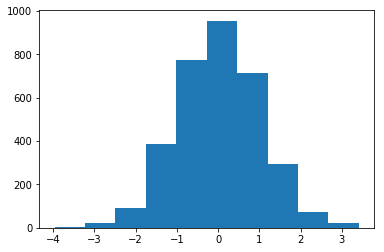

In [33]:
a = np.random.randn(len(data))
plt.hist(a)

In [43]:
# se puede devidir a valores menores a un valor
check = (a < 1) 
check

array([False,  True,  True, ...,  True, False,  True])

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'float'

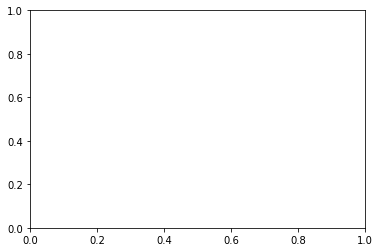

In [45]:
plt.hist(check.all)